<a href="https://colab.research.google.com/github/Koruvika/traffic-signs-recognition/blob/master/src/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import os
import cv2

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
!unzip -q /content/drive/MyDrive/Data/data.zip -d /content/data

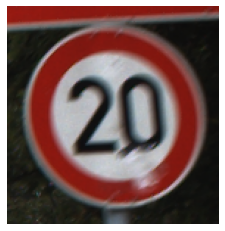

In [4]:
img = plt.imread("/content/data/Train/0/00000_00000_00029.png")
plt.imshow(img)
plt.axis('off')
plt.show()

In [5]:
TRAIN_PATH = '/content/data/Train'
TEST_PATH = 'content/data/Test'

In [6]:
IMG_WIDTH = 80
IMG_HEIGHT = 80
BATCH_SIZE = 32

In [7]:
classes_names = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [8]:
train_ds = keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    seed = 42,
    validation_split=0.2,
    subset='training'
)

val_ds = keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    batch_size=BATCH_SIZE,
    image_size=(IMG_HEIGHT, IMG_WIDTH),
    seed = 42,
    validation_split=0.2,
    subset='validation'
)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.


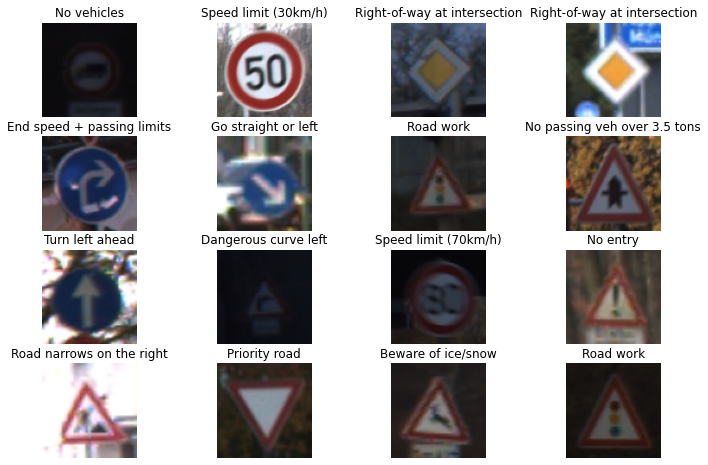

In [9]:
for images, labels in train_ds.take(1):
    fig = plt.figure(figsize=(12,8))
    for i in range(16):
        fig.add_subplot(4,4, i+1)
        plt.imshow(images[i].numpy()/255.)
        plt.axis('off')
        plt.title(classes_names[int(train_ds.class_names[labels[i].numpy()])])
    plt.show()
    break

In [10]:
resnet50 = keras.applications.resnet50.ResNet50(
    include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)
)
resnet50.trainable = False
classes = 43
inputs = keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3))
x = resnet50(inputs)
x = keras.layers.Flatten()(x)
outputs = keras.layers.Dense(43, activation='softmax')(x)

model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

94781440/94765736 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 resnet50 (Functional)       (None, 3, 3, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 43)                792619    
                                                                 
Total params: 24,380,331
Trainable params: 792,619
Non-trainable params: 23,587,712
_________________________________________________________________


In [11]:
model.compile(optimizer=keras.optimizers.Adam(0.001), loss=keras.losses.SparseCategoricalCrossentropy(), metrics='accuracy')

In [12]:
history = model.fit(train_ds, epochs=20, validation_data=val_ds)

Epoch 1/20
981/981 [==============================] - 83s 71ms/step - loss: 1.3686 - accuracy: 0.7920 - val_loss: 0.5827 - val_accuracy: 0.9042
Epoch 2/20
981/981 [==============================] - 71s 72ms/step - loss: 0.4053 - accuracy: 0.9338 - val_loss: 0.8996 - val_accuracy: 0.9007
Epoch 3/20
981/981 [==============================] - 68s 69ms/step - loss: 0.2629 - accuracy: 0.9569 - val_loss: 0.6933 - val_accuracy: 0.9249
Epoch 4/20
981/981 [==============================] - 68s 69ms/step - loss: 0.2633 - accuracy: 0.9629 - val_loss: 0.7268 - val_accuracy: 0.9277
Epoch 5/20
981/981 [==============================] - 67s 69ms/step - loss: 0.2266 - accuracy: 0.9695 - val_loss: 0.5790 - val_accuracy: 0.9455
Epoch 6/20
981/981 [==============================] - 67s 68ms/step - loss: 0.2040 - accuracy: 0.9745 - val_loss: 0.5663 - val_accuracy: 0.9475
Epoch 7/20
981/981 [==============================] - 67s 68ms/step - loss: 0.1901 - accuracy: 0.9790 - val_loss: 0.7753 - val_accuracy:

In [13]:
model.save('/content/traffic_signs_recognition.h5')